In [1]:
import os

In [2]:
data_dir="C:\\Users\\DELL\\Downloads\\cell_images\\cell_images"

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
train_path=data_dir+"\\train\\"
test_path=data_dir+"\\test\\"

In [7]:
test_path

'C:\\Users\\DELL\\Downloads\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+"parasitized\\")[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell=train_path+"parasitized\\"+"C100P61ThinF_IMG_20150918_144104_cell_162.png"
imread(para_cell).shape

(148, 142, 3)

In [12]:
para_image=imread(para_cell)

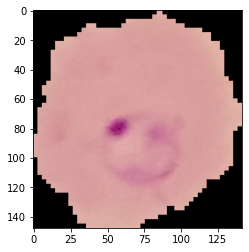

In [13]:
plt.imshow(para_image)

In [14]:
os.listdir(train_path+"uninfected\\")[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell=train_path+"uninfected\\"+"C100P61ThinF_IMG_20150918_144104_cell_128.png"

In [16]:
imread(uninfected_cell).shape

(139, 160, 3)

In [17]:
uninfected_image=imread(uninfected_cell)

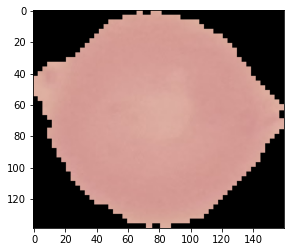

In [18]:
plt.imshow(uninfected_image)

In [19]:
len(os.listdir(train_path+"parasitized"))

12480

In [20]:
len(os.listdir(train_path+"uninfected"))

12480

In [21]:
#shape of every image

In [22]:
dim1=[]
dim2=[]
for i in os.listdir(test_path+"parasitized\\"):
    r,c,ch=imread(test_path+"parasitized\\"+i).shape
    dim1.append(r)
    dim2.append(c)
dim1=np.array(dim1)
dim2=np.array(dim2)

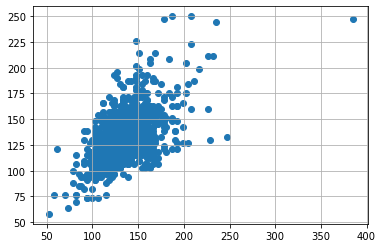

In [23]:
plt.scatter(dim1,dim2)
plt.grid()

In [24]:
dim1.mean(),dim2.mean()

(134.64307692307693, 133.31846153846155)

In [25]:
image_shape=(130,130,3)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,
                            shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode="nearest" )

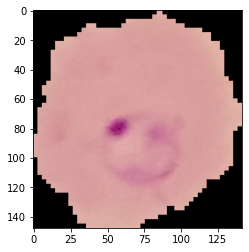

In [28]:
plt.imshow(imread(para_cell))

In [29]:
image_gen.random_transform(para_image).shape

(148, 142, 3)

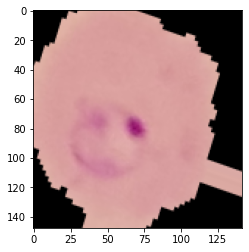

In [30]:
plt.imshow(image_gen.random_transform(para_image))

In [31]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [34]:
from keras.models import Sequential
model=Sequential()

In [35]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [37]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [38]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitmodelor="val_loss",patience=2)

In [41]:
batch_size=16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [42]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[es])

Epoch 1/20
1560/1560 [==============================] - 766s 490ms/step - loss: 1.0447 - accuracy: 0.5540 - val_loss: 0.6892 - val_accuracy: 0.5458
Epoch 2/20
1560/1560 [==============================] - 1617s 1s/step - loss: 0.6788 - accuracy: 0.5795 - val_loss: 0.6823 - val_accuracy: 0.5612
Epoch 3/20
1560/1560 [==============================] - 668s 428ms/step - loss: 0.6745 - accuracy: 0.5884 - val_loss: 0.6604 - val_accuracy: 0.6135
Epoch 4/20
1560/1560 [==============================] - 809s 518ms/step - loss: 0.6702 - accuracy: 0.5986 - val_loss: 0.6662 - val_accuracy: 0.5977
Epoch 5/20
1560/1560 [==============================] - 420s 269ms/step - loss: 0.3490 - accuracy: 0.8516 - val_loss: 0.2030 - val_accuracy: 0.9392
Epoch 6/20
1560/1560 [==============================] - 634s 406ms/step - loss: 0.1902 - accuracy: 0.9430 - val_loss: 0.1727 - val_accuracy: 0.9435
Epoch 7/20
1560/1560 [==============================] - 481s 308ms/step - loss: 0.1804 - accuracy: 0.9455 - val_lo

In [47]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

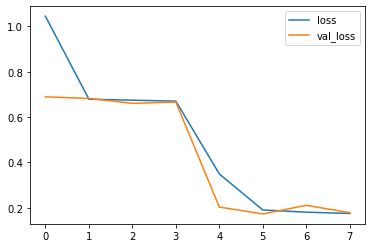

In [48]:
losses[['loss','val_loss']].plot()

In [49]:
model.evaluate_generator(test_image_gen)

[0.17489036917686462, 0.9449999928474426]

In [50]:
pred=model.predict_generator(test_image_gen)

In [51]:
prediction=pred>0.5

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(test_image_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [55]:
confusion_matrix(test_image_gen.classes,prediction)

array([[1216,   84],
       [  67, 1233]], dtype=int64)

##### Predicting on an Image 

In [56]:
para_cell

'C:\\Users\\DELL\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [60]:
from tensorflow.keras.utils import load_img, img_to_array

In [62]:
my_image = load_img(para_cell,target_size=image_shape)

In [63]:
my_image = img_to_array(my_image)

In [64]:
my_image = np.expand_dims(my_image, axis=0)

In [65]:
my_image.shape

(1, 130, 130, 3)

In [66]:
model.predict(my_image)

1/1 [==============================] - 0s 98ms/step


array([[0.00912151]], dtype=float32)

In [67]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}